# Chapter 7 - Programming with Qiskit
This Jupyter notebook has been updated to work with Python 3.13, Qiskit v 2.1, Qiskit runtime version: 0.40.
|||
|-|-|
|**Author:** |Robert Loredo|
|**Reviewer:** |Alain Chancé|
|**Date:** |August 28, 2025|
|**Version:** |**2.00**<br/>*Details see at the end of this notebook*|
|**References:**|
[Robert Loredo, Learn Quantum Computing with Python and IBM Quantum: Write your own practical quantum programs with Python, Second Edition, Packt, Feb 25, 2025](https://www.packtpub.com/en-us/product/learn-quantum-computing-with-python-and-ibm-quantum-9781803240923)
[Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/Chapter 7 - Programming with Qiskit.ipynb](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/blob/main/Chapter%207%20-%20Programming%20with%20Qiskit.ipynb)
[Packt's code repository for the book](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition)
[LICENSE](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/blob/main/LICENSE)
[qiskit-community/qiskit-dynamics](https://github.com/qiskit-community/qiskit-dynamics)
<br/>

In [1]:
# Load helper file
%run helper_file_1.0.ipynb

qc = QuantumCircuit(2,2)

Qiskit version: 2.1.1
Qiskit runtime version: 0.40.1
/home/alain/miniconda3/bin/python
Python 3.13.5


In [2]:
# Added by Alain Chancé
# The entire Qiskit Pulse package is deprecated as of Qiskit 1.3, it is removed in Qiskit 2.0 
# and moved to the Qiskit Dynamics repository: https://github.com/qiskit-community/qiskit-dynamics/
qiskit_dynamics_installed = False

# If Qiskit version >= 2
if int(qiskit.__version__[0]) >= 2:
    #Install qiskit-dynamics
    !pip install qiskit-dynamics
    qiskit_dynamics_installed = True
    print("\nqiskit-dynamics installed")
else:
    # Use Qiskit Pulse
    print("\nUsing Qiskit Pulse")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [qiskit-dynamics]

qiskit-dynamics installed


# Customizing and optimizing quantum circuits

## Components of a quantum circuit

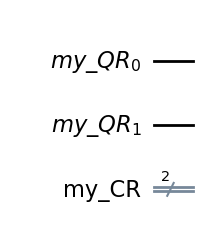

In [3]:
# Import registers
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(2, 'my_QR')
cr = ClassicalRegister(2, 'my_CR')
qc = QuantumCircuit(qr,cr)
qc.draw(output='mpl')


Figure 8.1: Customized quantum and classical register labels

In [4]:
qc = QuantumCircuit(QuantumRegister(2, 'my_QR'), ClassicalRegister(2, 'my_CR'))

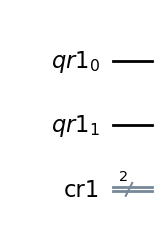

In [5]:
#Create the quantum and classical registers, each with labels
qr1 = QuantumRegister(2, name='qr1')
cr1 = ClassicalRegister(2, name='cr1')
#Create the quantum circuit using the registers
qc1 = QuantumCircuit(qr1, cr1)
#Draw the circuit
qc1.draw(output='mpl')


Figure 8.2: The first of the two quantum circuits we will join

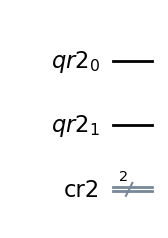

In [6]:
#Create two Quantum and Classical registers
qr2 = QuantumRegister(2, name='qr2')
cr2 = ClassicalRegister(2, name='cr2')
#Create a second circuit using the registers created above
qc2 = QuantumCircuit(qr2, cr2)
#Draw the second quantum circuit
qc2.draw(output='mpl')


Figure 8.3: The second of the two quantum circuits we will join

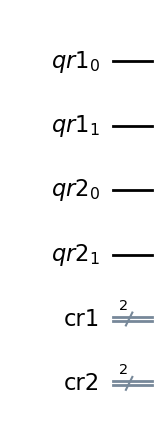

In [7]:
#Concatenate the two previous circuits to create a new circuit
#Create an empty quantum circuit
qc_combined = QuantumCircuit()
#Add the two previous quantum and classical registers to the empty quantum circuit
qc_combined.add_register(qr1, qr2, cr1, cr2)
#Draw the concatenated circuit
qc_combined.draw(output='mpl')


Figure 8.4: Concatenation of two quantum circuits

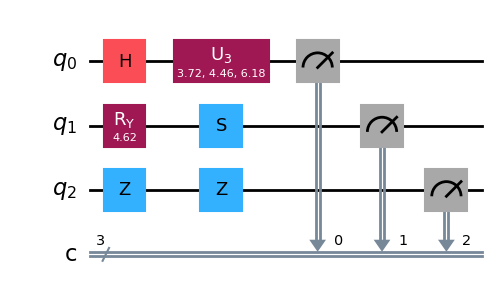

In [8]:
#Import the random_circuit class
from qiskit.circuit.random import random_circuit
#Construct the random circuit with the number of qubits = 3
#with a depth = 2, and include the measurement operator for each qubit
qc = random_circuit(3, 2, measure=True)
#Draw the circuit
qc.draw(output='mpl')


Figure 8.5: Random circuit generated with number of qubits = 3 and depth = 2

## Obtaining circuit properties and analysis

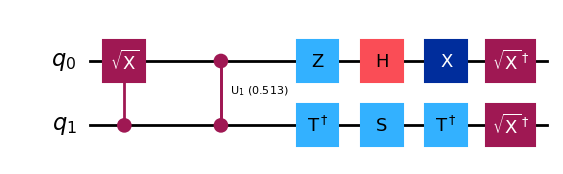

In [9]:
# Import the random circuit class
from qiskit.circuit.random import random_circuit
#Create two random circuits, each with 2 qubit registers and random #gate operator counts.
qc1 = random_circuit(2,2)
qc2 = random_circuit(2,4)
#Concatenate the two random circuits
qc = qc1.compose(qc2, [0,1])
#Draw the circuit
qc.draw(output='mpl')


Figure 8.6: Randomly generated two-qubit circuits with a depth of 6

In [10]:
#Define function to print circuit properties:
def print_circuit_props(qc):
    width = qc.width()
    depth = qc.depth()
    num_operators = qc.count_ops()
    circuit_size = qc.size()
    print('Width = ', width) 
    print('Depth = ', depth)
    print('Circuit size = ', circuit_size)
    print('Number of operators = ', num_operators)


In [11]:
#Pass our quantum circuit to print out the circuit properties
print_circuit_props(qc)


Width =  2
Depth =  6
Circuit size =  10
Number of operators =  OrderedDict({'tdg': 2, 'sxdg': 2, 'csx': 1, 'cu1': 1, 'z': 1, 's': 1, 'h': 1, 'x': 1})


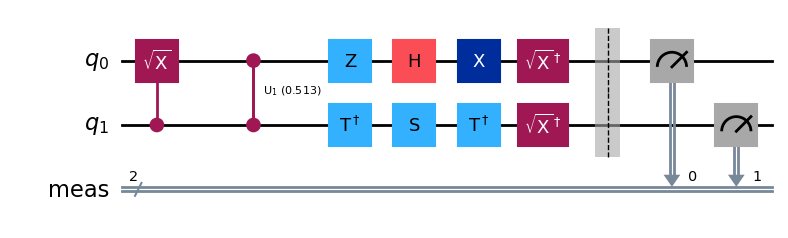

In [12]:
#Use measure_all() to automatically add the barrier, measurement, and #classical register to our existing circuit.
qc.measure_all()
#Draw the circuit
qc.draw(output='mpl')


Figure 8.7: Random circuit with classical components added

In [13]:
#Print out the circuit properties
print_circuit_props(qc)

Width =  4
Depth =  7
Circuit size =  12
Number of operators =  OrderedDict({'tdg': 2, 'sxdg': 2, 'measure': 2, 'csx': 1, 'cu1': 1, 'z': 1, 's': 1, 'h': 1, 'x': 1, 'barrier': 1})


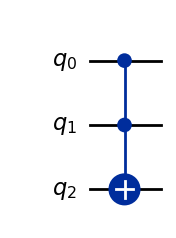

In [14]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw(output='mpl')


Figure 8.8: The Toffoli gate on a quantum circuit

In [15]:
#Print out the circuit properties
print_circuit_props(qc)


Width =  3
Depth =  1
Circuit size =  1
Number of operators =  OrderedDict({'ccx': 1})


Width =  3
Depth =  11
Circuit size =  15
Number of operators =  OrderedDict({'cx': 6, 't': 4, 'tdg': 3, 'h': 2})


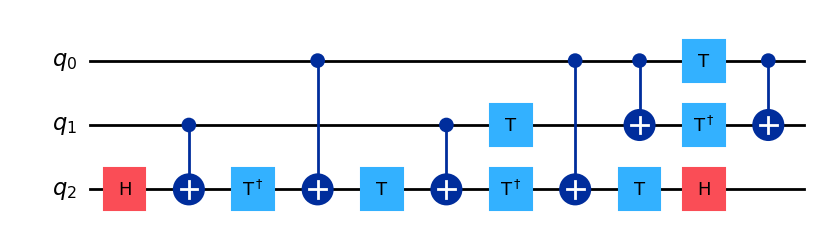

In [16]:
#Print out the circuit properties
print_circuit_props(qc.decompose())
qc.decompose().draw(output='mpl')

Decomposed random circuit with classical components added

# Customization and Parameterization of circuits

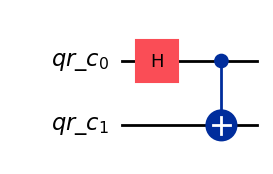

In [17]:
#Create a custom two-qubit composite gate
#Create the quantum register
qr = QuantumRegister(2, name='qr_c')
#Generate quantum circuit which will make up the composite gate
comp_qc = QuantumCircuit(qr, name='My-composite')
#Add any gates you wish to your composite gate
comp_qc.h(0)
comp_qc.cx(0, 1)
#Create the composite instructions by converting 
#the QuantumCircuit to a list of Instructions
composite_inst = comp_qc.to_instruction()
#Draw the circuit which will represent the composite gate
comp_qc.draw(output='mpl')


Figure 8.9: The quantum circuit that will represent the composite gate

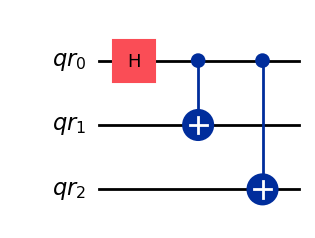

In [18]:
#Create your 2-qubit circuit to generate your composite gate
qr2 = QuantumRegister(3, 'qr')
#Create a quantum circuit using the quantum register
qc = QuantumCircuit(qr2)
#Add any arbitrary gates that would represent the function 
#of the composite gate 
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
#Draw the composite circuit
qc.draw(output='mpl')


Figure 8.10: The quantum circuit that we will append to the composite gate

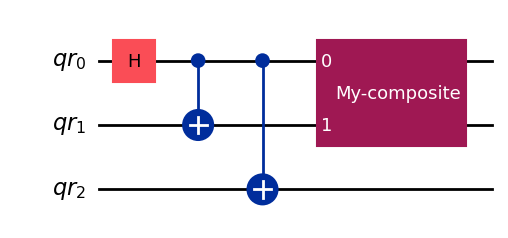

In [19]:
#Append your composite gate to the specified qubits. 
qc.append(composite_inst, [qr2[0], qr2[1]])
#Draw the complete circuit
qc.draw(output='mpl')


Figure 8.11: The quantum circuit with a composite gate representation of a predefined circuit

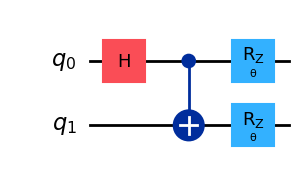

In [20]:
#Import the Parameter object
from qiskit.circuit import Parameter
#Construct the Parameter set to Theta
param_theta = Parameter('θ')
#Create a two-qubit quantum circuit and add some gates
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
#Include a rotation gate which we wish to apply 
#the Parameter value 
qc.rz(param_theta,0)
qc.rz(param_theta,1)
#Draw the circuit
qc.draw(output='mpl')


Figure 8.12: Set the parameter of the $Rz$ gate to $\theta$

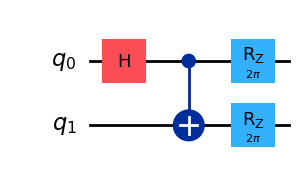

In [21]:
import numpy as np
#Bind the parameters with a value, in this case 2π
qc = qc.assign_parameters(parameters={param_theta: 2*np.pi})
#Draw the circuit with the set parameter values
qc.draw(output='mpl')


Figure 8.13: Rotation gates $Rz$ now have the Parameter value $\theta$ set to $2\pi$

# Generating Pulse schedules on quantum hardware

In [22]:
# Import pulse classes
Waveform_imported = False
if qiskit_dynamics_installed:
    try:
        from qiskit_dynamics import Waveform, DriveChannel, Play, Schedule
        Waveform_imported = True
    except:
        print(sys.exc_info())
else:
    try:
        from qiskit.pulse import Waveform, DriveChannel, Play, Schedule
        Waveform_imported = True
    except:
        print(sys.exc_info())

(<class 'ModuleNotFoundError'>, ModuleNotFoundError("No module named 'qiskit.pulse'"), <traceback object at 0x758e1be64740>)


In [23]:
# Modified by Alain Chancé
#Import numpy and generate the sin sample values
if Waveform_imported:
    import numpy as np
    x = np.linspace(0,2*np.pi,64)
    data = np.sin(x)
    #Generate our sample waveform 
    waveform = Waveform(data, name="sin_64_pulse")
    #Draw the generated sample waveform
    waveform.draw()

Figure 8.14: Sample pulse of a sine waveform

In [24]:
# Modified by Alain Chancé
GaussianSquare_imported = False
if qiskit_dynamics_installed:
    try:
        from qiskit_dynamics import GaussianSquare
        GaussianSquare_imported = True
    except:
        print(sys.exc_info())
else:  
    #Import the Gaussian Square pulse from Pulse Library
    try:
        from qiskit.pulse.library import GaussianSquare
        GaussianSquare_imported = True
    except:
        print(sys.exc_info())

if GaussianSquare_imported:
    #Create a Gaussian Square pulse: 
    #Args: duration, amp, sigma, width, name
    gaussian_square_pulse = GaussianSquare(128,1,2,112, name="gaussian square")
    gaussian_square_pulse.draw()

(<class 'ModuleNotFoundError'>, ModuleNotFoundError("No module named 'qiskit.pulse'"), <traceback object at 0x758e1be534c0>)


Figure 8.15: Gaussian square pulse

# Generating and executing Schedules

In [25]:
# Modified by Alain Chancé
if GaussianSquare_imported:
    #Create the first schedule with our Gaussian Square pulse
    schedule_1 = Schedule(name='Schedule 1')
    schedule_1 = schedule_1.insert(0, Play(gaussian_square_pulse, DriveChannel(0)))

    #Draw the schedule
    display(schedule_1.draw())

Figure 8.16: Schedule 1: Gaussian square pulse

In [26]:
# Modified by Alain Chancé
if GaussianSquare_imported:
    #Create a second schedule with our sample waveform
    schedule_2 = Schedule(name='Schedule 2')
    schedule_2 = schedule_2.insert(0, Play(waveform, DriveChannel(0)))

    #Draw the schedule
    display(schedule_2.draw())

Figure 8.17: Schedule 2: sample (sine waveform) pulse

In [27]:
# Modified by Alain Chancé
if GaussianSquare_imported:
    #Let's create a third schedule 
    #Where we add the first schedule and second schedules
    #And shift the second to the right by a time of 5 after the first
    schedule_3 = schedule_1.insert(schedule_1.duration+5, schedule_2)
    
    display(schedule_3.draw())

Figure 8.18: Schedule 3, combining schedules 1 and 2 with a 5 time unit difference in between

In [28]:
# Modified by Alain Chancé
if GaussianSquare_imported:
    #We could have also combined the two using the append operator
    #The two schedules are appended immediately after one another
    schedule_3_append = schedule_1.append(schedule_2)
    
    display(schedule_3_append.draw())

Figure 8.19: Schedule 3, appending two schedules without a time gap in between

# Understanding the Job component

In [29]:
# Run the simple quantum circuit on local Sampler
# Modified by Alain Chancé
#from qiskit.primitives import Sampler
from qiskit.primitives import StatevectorSampler

#sampler = Sampler()
sampler = StatevectorSampler()

# Create a simple circuit
qc = QuantumCircuit(1,1)
qc.h(0)
#qc.measure([0],[0])
qc.measure_all()

# Run the qc circuit
#job = sampler.run(qc, shots=1024)
job = sampler.run([qc], shots=1024)

print(job.status())

JobStatus.RUNNING


In [30]:
#From the previous output of executed jobs, obtain the job id 
#and print out information about the Job.
print('Print Job ID: ', job.job_id())
print('Print Job Status: ', job.status())
print('Print Job Result: ', job.result())

Print Job ID:  c32107cd-623e-4a46-bdd0-a6fa74d5f0ed
Print Job Status:  JobStatus.DONE
Print Job Result:  PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=1>), meas=BitArray(<shape=(), num_shots=1024, num_bits=1>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


In [31]:
# Modified by Alain Chancé
#job_result = job.result()

#quasi_dists = job_result.quasi_dists

#Get the result counts 
#co#unts = quasi_dists[0].binary_probabilities()

#print(counts)
#plot_distribution(counts)

# Execute the circuit and capture all the results
result, img, histogram = execute_circuit_returns(qc)

In [32]:
result

{'1': 536, '0': 488}

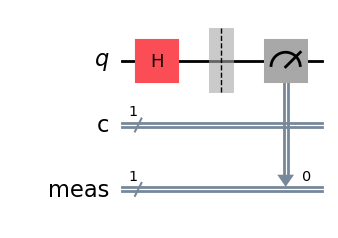

In [33]:
img

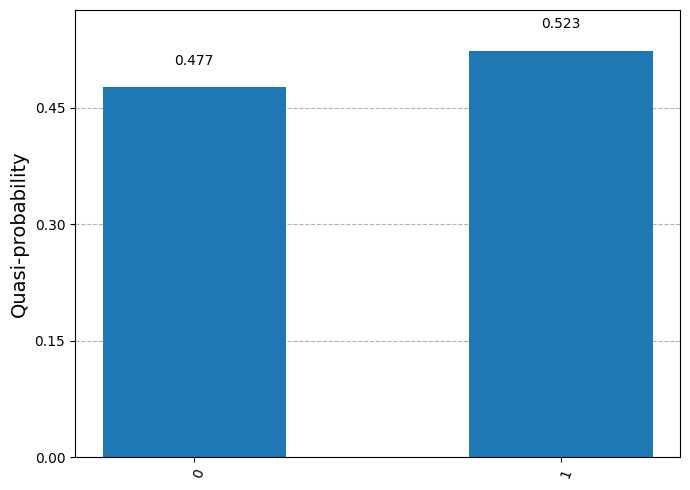

In [34]:
histogram

## Qiskit packages versions

In [35]:
import qiskit
import qiskit_ibm_runtime
import qiskit_aer

print(f'Qiskit: {qiskit.__version__}')
print(f'Qiskit IBM Runtime: {qiskit_ibm_runtime.__version__}')
print(f"Qiskit Aer version: {qiskit_aer.__version__}")

Qiskit: 2.1.1
Qiskit IBM Runtime: 0.40.1
Qiskit Aer version: 0.17.1


Figure 8.20: The probability results as a histogram

## Show Python version

In [36]:
%%bash
which python
python --version

/home/alain/miniconda3/bin/python
Python 3.13.5
